In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

In [2]:
import sympy as sm
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import fourier_series, pi
from sympy.abc import x

In [3]:
mae = lambda x: np.mean(np.abs(x))
mse = lambda x: np.mean(x ** 2)

In [4]:
f = lambda x: sm.sin(10 * x) + x
s = fourier_series(f(x), (x, -pi, pi))

In [5]:
X = np.linspace(-1, 1, 100)
Y = np.sin(10 * X) + X

In [6]:
S = lambda n: lambdify(x, s.truncate(n))

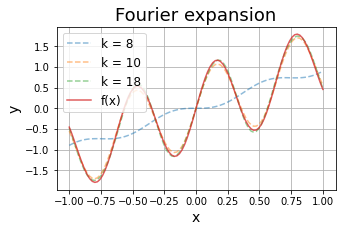

In [10]:
k1, k2, k3 = 8, 10, 18

y1 = S(k1)(X)
y2 = S(k2)(X)
y3 = S(k3)(X)

er1 = mse(Y - y1).item()
er2 = mse(Y - y2).item()
er3 = mse(Y - y3).item()

plt.figure(figsize=(5, 3))
plt.title('Fourier expansion', fontsize=18)
plt.plot(X, y1, '--', label=f'k = {k1}', alpha=0.5)
plt.plot(X, y2, '--', label=f'k = {k2}', alpha=0.5)
plt.plot(X, y3, '--', label=f'k = {k3}', alpha=0.5)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.plot(X, Y, '-', label='f(x)', alpha=0.75, scalex=False, scaley=False)
plt.legend(fontsize=12)
plt.grid()

In [12]:
errors = np.array([ mse(Y - S(k)(X)).item() for k in range(100)])

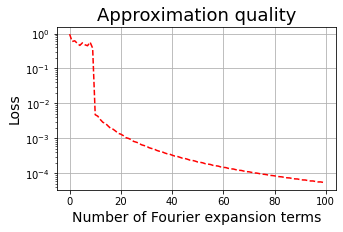

In [14]:
plt.figure(figsize=(5, 3))
# plt.subplot(1, 2, 1)
plt.title('Approximation quality', fontsize=18)
plt.xlabel('Number of Fourier expansion terms', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.semilogy(errors, '--r', label='Loss')
# plt.legend(fontsize=12)
plt.grid()

# plt.subplot(1, 2, 2)
# plt.title('Approximation quality', fontsize=16)
# plt.plot(np.log(errors), '--r', label='Log loss')
# plt.xlabel('Number of Fourier expansion terms', fontsize=14)
# plt.ylabel('Loss', fontsize=14)
# plt.grid()
# plt.legend(fontsize=14)

plt.show()